# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [46]:
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

filename_features = "features.txt"
filename_labels = "activity_labels.txt"

filename_subtrain = "subject_train.txt"
filename_xtrain = "X_train.txt"
filename_ytrain = "y_train.txt"

filename_subtest = "subject_test.txt"
ffilename_xtest = "X_test.txt"
filename_ytest = "y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'])
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None)
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'])
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None)
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [47]:
clf = DecisionTreeClassifier(ccp_alpha=0.001).fit(X_train, y_train)
print(f'Acurácia treino: {clf.score(X_train, y_train)}')
print(f'Acurácia teste: {clf.score(X_test, y_test)}')



Acurácia treino: 0.9757889009793254
Acurácia teste: 0.8805564981336953


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [48]:
pca = PCA(n_components=1).fit(X_train)

pc_treino = pca.transform(X_train)
pc_teste = pca.transform(X_test)

In [49]:
pc_clf = DecisionTreeClassifier(ccp_alpha=0.001).fit(pc_treino, y_train)
print(f'Acurácia treino: {pc_clf.score(pc_treino, y_train)}')
print(f'Acurácia teste: {pc_clf.score(pc_teste, y_test)}')

Acurácia treino: 0.499727965179543
Acurácia teste: 0.45707499151679676


## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [50]:
ns = [1, 2, 5, 10, 20, 50]

pca = PCA(n_components=ns[-1]).fit(X_train)
pc_train = pca.transform(X_train)
pc_test = pca.transform(X_test)

pc_clfs = []
for n in ns:
    pc_clf = DecisionTreeClassifier(ccp_alpha=0.001).fit(pc_train[:, :n], y_train)
    pc_clfs.append(pc_clf)

<Axes: >

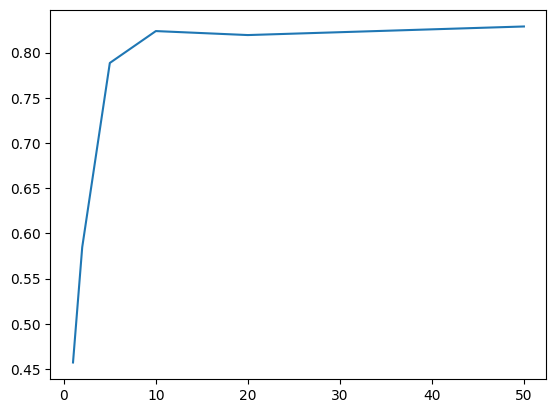

In [51]:
accs = [clf.score(pc_test[:, :n], y_test) for n, clf in zip(ns, pc_clfs)]

sns.lineplot(x=ns, y=accs)

## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

Com apenas 10 variáveis e 2,4 segundos na minha máquina, consegui uma acurácia de mais de 80%